# Experiment 6 (using tensorflow tutorial)

Found 1408 images belonging to 2 classes.
Shape of sample_labels: (32,)


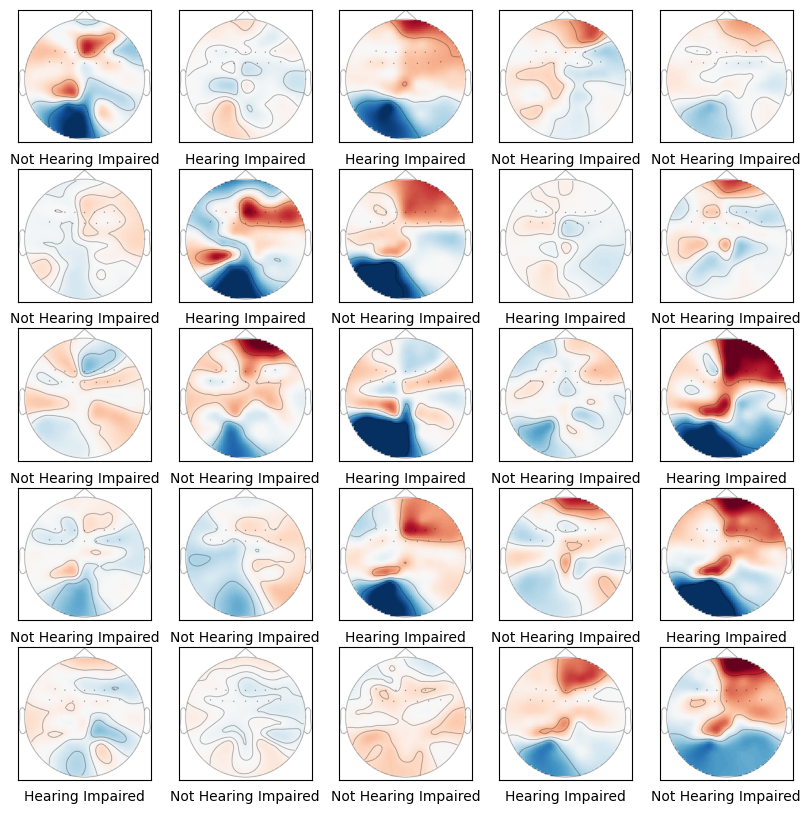

Found 352 images belonging to 2 classes.
Shape of val_sample_labels: (32,)


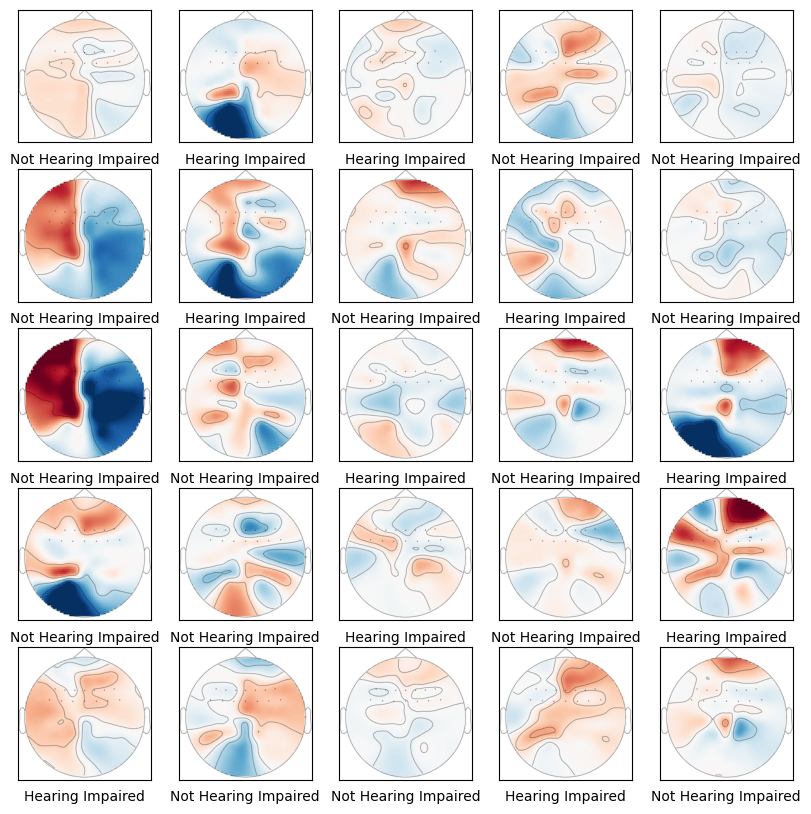

In [85]:
# dataset: got each patient's scalp map at every 10th millisecond from 0ms - 400ms on their ERP waveform. 
# This gave us 40 images per patient which is a total of 1,760 images

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare dataset


# Define relevant variables for the ML task
batch_size = 32
num_classes = 2

# Define the path to your dataset
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Define the transformations
all_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to be between 0 and 1
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load the full dataset using flow_from_directory
train_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    subset='training'  # Use subset='validation' for the validation dataset
)


# Get a sample batch of images and labels
sample_images, sample_labels = next(iter(train_dataset))
# Print the shape of sample_labels
print("Shape of sample_labels:", sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']
# Visualize a sample of 25 images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()


val_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    subset='validation'  # Use subset='training' for the training dataset
)

# Get a sample batch of images and labels from the validation dataset
val_sample_images, val_sample_labels = next(iter(val_dataset))
# Print the shape of val_sample_labels
print("Shape of val_sample_labels:", val_sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']

# Visualize a sample of 25 images with labels from the validation dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()

In [86]:
# create the convolutional base
# The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

# As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these
#  dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the 
#  format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of your model so far:


model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-tra

In [87]:
# Add Dense layers on top
# To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform
#  classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 
# 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Here's the complete architecture of your model:

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_8 (Flatten)         (None, 173056)          

In [89]:
# # Compile the model using SparseCategoricalCrossentropy loss
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Train the model and store the training history
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=10
# )

# since you are dealing with a binary classification problem (only two classes), you should use BinaryCrossentropy with from_logits=False, 
# as the last layer of your model has a 'sigmoid' activation function, which produces probabilities directly.

# Compile the model using BinaryCrossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
44/44 [==============================] - 6s 116ms/step - loss: 0.5040 - accuracy: 0.7592 - val_loss: 0.4682 - val_accuracy: 0.7614
Epoch 2/10
44/44 [==============================] - 5s 111ms/step - loss: 0.4087 - accuracy: 0.8075 - val_loss: 0.4221 - val_accuracy: 0.7812
Epoch 3/10
44/44 [==============================] - 5s 107ms/step - loss: 0.3977 - accuracy: 0.8082 - val_loss: 0.4048 - val_accuracy: 0.7983
Epoch 4/10
44/44 [==============================] - 5s 109ms/step - loss: 0.3662 - accuracy: 0.8288 - val_loss: 0.4241 - val_accuracy: 0.7841
Epoch 5/10
44/44 [==============================] - 5s 120ms/step - loss: 0.2843 - accuracy: 0.8757 - val_loss: 0.3878 - val_accuracy: 0.8551
Epoch 6/10
44/44 [==============================] - 5s 112ms/step - loss: 0.2446 - accuracy: 0.8899 - val_loss: 0.4054 - val_accuracy: 0.8551
Epoch 7/10
44/44 [==============================] - 5s 112ms/step - loss: 0.2523 - accuracy: 0.8892 - val_loss: 0.2964 - val_accuracy: 0.8778
Epoch 

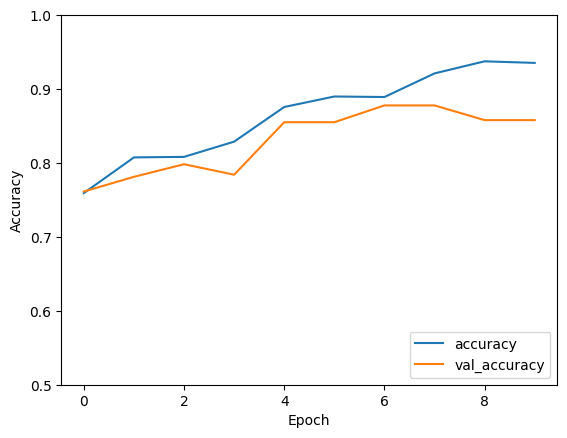

In [92]:
# Create plots for training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [93]:
# Evaluate the model on the test dataset (val_dataset in this case)
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_acc}")

11/11 [==============================] - 1s 84ms/step - loss: 0.3465 - accuracy: 0.8580
Test Accuracy: 0.8579545617103577


# Experiment 5 (Chat GPTed)

Found 1408 images belonging to 2 classes.
Found 352 images belonging to 2 classes.
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                    

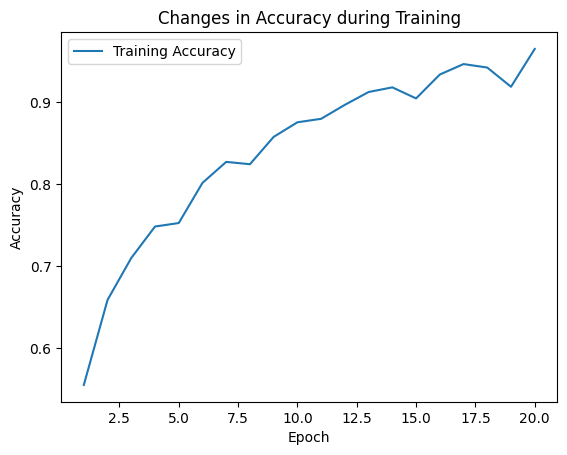

Average Training Accuracy: 0.8416903436183929
11/11 [==============================] - 1s 81ms/step - loss: 0.5426 - accuracy: 0.8409
Test Accuracy: 0.8409090638160706


In [68]:
# applying CNN on this dataset: got each patient's scalp map at every 10th millisecond from 0ms - 400ms on their ERP waveform. 
# This gave us 40 images per patient which is a total of 1,760 images
# I will be training this model from scratch meaning initializing random weights and making sure the model has no prior knoweldge on any other dataset.
#  using pretrained model might make my accuracy worse since the images are completely different

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Define relevant variables for the ML task
batch_size = 32
num_classes = 2
learning_rate = 0.001
num_epochs = 20

# Device will determine whether to run the training on GPU or CPU.
device = tf.device('gpu' if tf.test.is_gpu_available() else 'cpu')

# Define the path to your dataset
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Define the transformations
all_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load the full dataset using flow_from_directory
train_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    subset='training'
)

val_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    subset='validation'
)


# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=num_epochs
)

# Access the training accuracy for each epoch
train_accuracy = history.history['accuracy']

# Print the epochs and accuracy
for epoch, accuracy in enumerate(train_accuracy, 1):
    print(f"Epoch {epoch}: Training Accuracy = {accuracy}")

    # Create a graph of the changes in accuracy during training
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Changes in Accuracy during Training')
plt.legend()
plt.show()

# Calculate the average training accuracy
average_accuracy = sum(train_accuracy) / len(train_accuracy)
print(f"Average Training Accuracy: {average_accuracy}")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_accuracy}")

# Experiment 4

In [ ]:
# update: i never got to finish this 
# I'm going to try to stack the images, around 15 images to train the model
# the suggestion is to stack multiple images side by side, resulting in a 15-channel input tensor with dimensions n x n x 15. 
# This means that instead of feeding a single image into the CNN model, I would feed a combination of five++ images stacked together.

# By stacking multiple images, I increase the input depth and potentially capture more contextual information for the model to learn from. 

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]
 
data_dir = pathlib.Path("path_to_your_data_directory")

# Define the number of images to stack
num_channels = 5

# Set the image dimensions
img_height, img_width = 224, 224

# Create an empty list to store the stacked image data
stacked_images = []

# Iterate over the images in the data directory
for image_path in data_dir.glob("*.jpg"):
    # Load the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    
    # Append the image array to the stacked images list
    stacked_images.append(image_array)

# Convert the stacked images list to a numpy array
stacked_images = np.array(stacked_images)

# Reshape the stacked images array to include the number of channels
stacked_images = stacked_images.reshape(-1, img_height, img_width, num_channels)

# Normalize the pixel values (optional)
stacked_images = stacked_images / 255.0

# Create labels for the stacked images (adjust as per your dataset)
labels = np.array([0, 1, 0, 1, 1])  # Example labels

# Split the data into training and validation sets
train_ds = tf.data.Dataset.from_tensor_slices((stacked_images, labels)).batch(batch_size).shuffle(buffer_size)
val_ds = tf.data.Dataset.from_tensor_slices((stacked_images, labels)).batch(batch_size)

# Proceed with the model training using the modified data

# Modify the data loading and preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

# ... Load and preprocess the validation dataset similarly

# Stack multiple images together for training dataset
train_ds_stacked = train_ds.map(lambda x, y: (tf.stack(x, axis=-1), y))

# ... Stack validation dataset similarly

# Modify the model architecture
resnet_model = Sequential()
pretrained_model = ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, num_channels),
    pooling='avg',
    classes=len(class_names),
    weights='imagenet'
)

# ... Rest of the model architecture remains the same

# Compile and train the model
resnet_model.compile(optimizer=Adam(lr=1), loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
history = resnet_model.fit(
  train_ds_stacked,
  validation_data=val_ds_stacked,
  epochs=epochs
)

# ... Plot the accuracy graph


# Experiment 3

Found 44 files belonging to 2 classes.
Using 36 files for training.
Found 44 files belonging to 2 classes.
Using 8 files for validation.
['Hearing Impaired', 'Not Hearing Impaired']


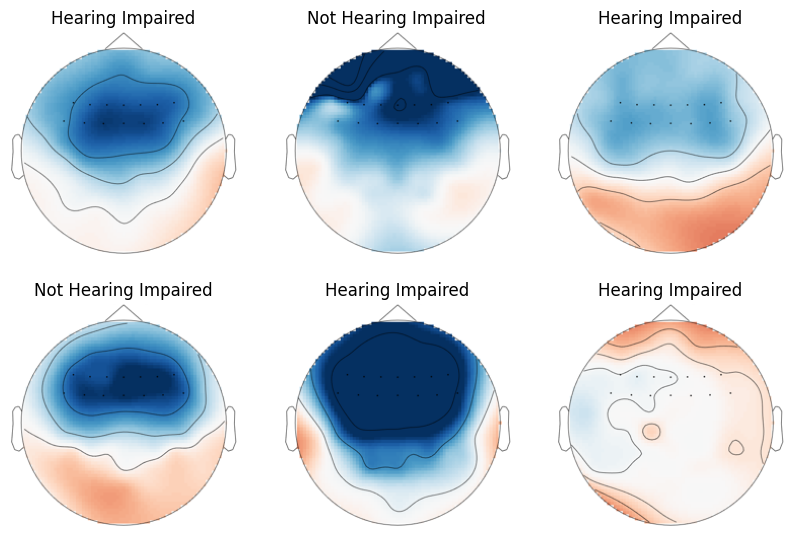

In [58]:
# resnet50 model on a subclass, so just one component/time which is only 44 images

import matplotlib.pyplot as plt
import numpy as np
# import osM
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:/Users/student/Documents/snhl-ERP/machine learning/N1")
# print(data_dir)

# Replace the existing logic for loading and preprocessing images with your own
# ...

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]

img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")




In [59]:
# Training The Model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Updated output layer
resnet_model.summary()
resnet_model.compile(optimizer=Adam(lr=1),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_33 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_34 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_35 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________

c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 2/10
2/2 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 3/10
2/2 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 5/10
2/2 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 6/10
2/2 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 7/10
2/2 [==============================] - 0s 130ms/step - loss: 0.0000e+00 - accuracy: 0.5278 - val_loss: 0.0000e+00 - val_

# Evaluating The Model

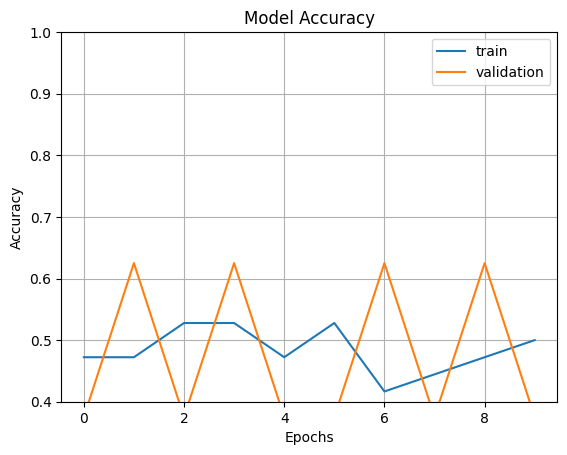

In [61]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

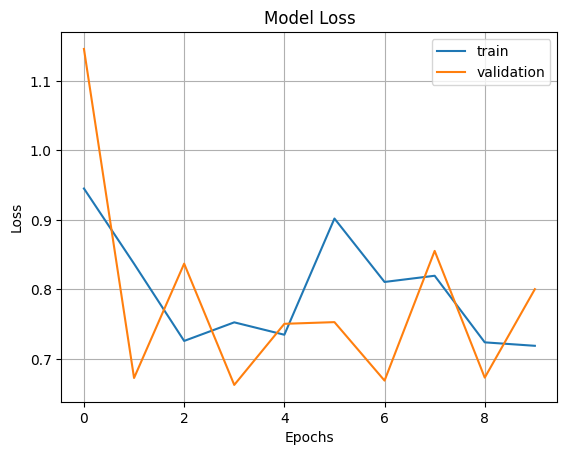

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Experiment 2

In [60]:
# adjusting learning rate, epoches and such for # resnet50 model on a subclass, so just one component/time which is only 44 images


import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:/Users/student/Documents/snhl-ERP/machine learning/N1")

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 8

# Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
    ]
)

# Load and preprocess the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
)

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Define the base model (ResNet50) with pre-trained weights
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3),
    pooling="avg",
)

# Freeze the layers of the base model
base_model.trainable = False

# Build the model
model = Sequential([
    data_augmentation,
    base_model,
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Found 44 files belonging to 2 classes.
Using 36 files for training.
Found 44 files belonging to 2 classes.
Using 8 files for validation.
Epoch 1/10
5/5 [==============================] - 12s 556ms/step - loss: 0.9451 - accuracy: 0.4722 - val_loss: 1.1461 - val_accuracy: 0.3750
Epoch 2/10
5/5 [==============================] - 1s 119ms/step - loss: 0.8369 - accuracy: 0.4722 - val_loss: 0.6724 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 1s 110ms/step - loss: 0.7257 - accuracy: 0.5278 - val_loss: 0.8370 - val_accuracy: 0.3750
Epoch 4/10
5/5 [==============================] - 1s 113ms/step - loss: 0.7525 - accuracy: 0.5278 - val_loss: 0.6624 - val_accuracy: 0.6250
Epoch 5/10
5/5 [==============================] - 1s 108ms/step - loss: 0.7346 - accuracy: 0.4722 - val_loss: 0.7504 - val_accuracy: 0.3750
Epoch 6/10
5/5 [==============================] - 1s 107ms/step - loss: 0.9019 - accuracy: 0.5278 - val_loss: 0.7528 - val_accuracy: 0.3750
Epoch 7/10
5/5 [======

# Experiment 1

Found 212 files belonging to 2 classes.
Using 170 files for training.
Found 212 files belonging to 2 classes.
Using 42 files for validation.
['Healthy', 'Hearimg Impaired']


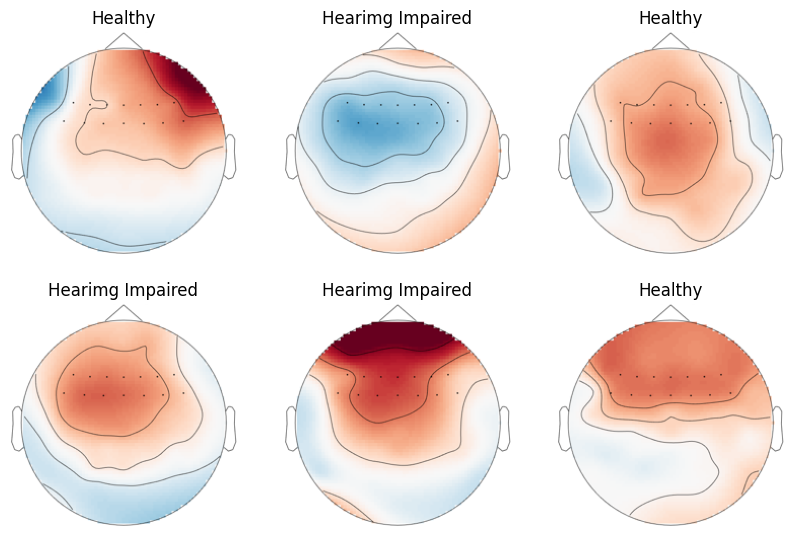

In [51]:
# resnet50 model on 2 classes where each patient has 5 images that come from different time points. accuracy is not the best

import matplotlib.pyplot as plt
import numpy as np
# import osM
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\generalized-dataset")
# print(data_dir)

# Replace the existing logic for loading and preprocessing images with your own
# ...

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]

img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [54]:
# Training The Model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Updated output layer
resnet_model.summary()
resnet_model.compile(optimizer=Adam(lr=1),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_30 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_31 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_32 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________

# Reference code

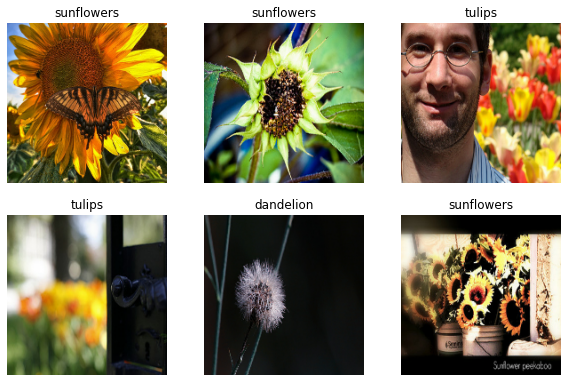

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 418s 5s/step - loss: 0.7422 - accuracy: 0.7715 - val_loss: 0.4269 - val_accuracy: 0.8488
Epoch 2/10
92/92 [==============================] - 396s 4s/step - loss: 0.2997 - accuracy: 0.8879 - val_loss: 0.3935 - val_accuracy: 0.8488
Epoch 3/10
92/92 [==============================] - 387s 4s/step - loss: 0.1788 - accuracy: 0.9380 - val_loss: 0.3644 - val_accuracy: 0.8638
Epoch 4/10
92/92 [==============================] - 391s 4s/step - loss: 0.1041 - accuracy: 0.9659 - val_loss: 0.4643 - val_accuracy: 0.8392
Epoch 5/10
92/92 [==============================] - 386s 4s/step - loss: 0.0598 - accuracy: 0.9843 - val_loss: 0.3616 - val_accuracy: 0.8774
Epoch 6/10
92/92 [==============================] - 387s 4s/step - loss: 0.0279 - accuracy: 0.9976 - val_loss: 0.3967 - val_accuracy: 0.8787
Epoch 7/10
92/92 [==============================] - 386s 4s/step - loss: 0.0143 - accuracy: 0.9993 - val_loss: 0.4017 - val_accuracy: 0.8937
Epoch 8/10
92

# Evaluating The Model

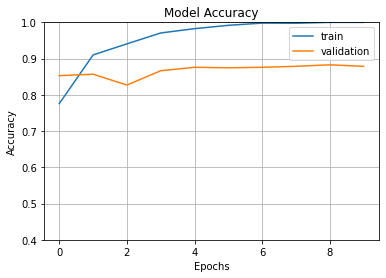

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

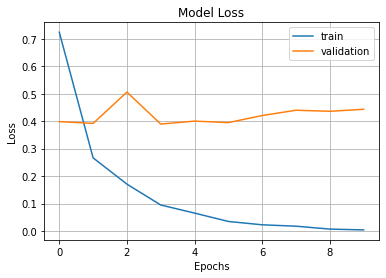

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

[[8.2068445e-06 1.5209365e-06 9.9347222e-01 9.5006551e-05 6.4231041e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
